# <center>Varun_Kumar(142002018)</center>

# <center>AI for Cybersecurity(Malware Detection)</center>

## Problem Statement
In this assignment, you are going to build your own malware detection system. Here you
are going to use only Windows executables. You are required to use the python utility
pefile and linux command line utility strings to extract the static features from each PE file.
Setup:
Since the dataset contains malware executables, don’t try to open the samples in the
dataset. Set up an Ubuntu virtual machine (higher than 16.04) and write the python code
for the below.
Perform the below tasks to implement the malware detection model.
1. Download the dataset given as zipped file “malware_dataset.zip”. The dataset
consists of 3 folders ‘malware’ with 443 samples, ‘benignware’ with 400 samples
and ‘testdata’ with 50 samples
2. Extract static features from each benign and malicious executable using python
utility pefile and linux command line utility strings to represent the sample as an
array of numbers. Assign the label as ‘1’ for malware and ‘0’ for benignware. This
step also includes research to design good features that will help your machine
learning system make accurate inferences. (Maximum number of features: 50)
3. Split dataset into non-overlapping training and test sets, in which the training set
consists of 70% of the data (an arbitrarily chosen proportion) and the test set
consists of the remaining 30%.4. Train the below 2 machine learning classifiers to recognize malware using the
features we have extracted. Use the inbuilt functions from sklearn for
implementing the models and calculating metrics
 K-Nearest Neighbors
 Random Forest
5. Test your model and calculate the prediction accuracy, false-positive rate and
confusion matrix.
6. Predict whether the executables in the dataset folder ‘testdata’ is malware or
benignware and write the results to a csv file in the name “testlabel.csv”. Format is
given below. Mention ‘1’ in “Category” column if file is malware, else 0.

## Importing the necessary libraries

In [1]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup
import os
from pathlib import Path

## I craete one csv file which have all exe filepath(file location)

## loading csv file

In [2]:
data=pd.read_csv("index",sep=' ',header=None)
data.head()

0                                              1
0  malware  ../malware/Backdoor.Win32.Agent.bhin_088e.exe
1  malware  ../malware/Backdoor.Win32.Agent.bhin_0c2a.exe
2  malware  ../malware/Backdoor.Win32.Agent.bhin_1119.exe
3  malware  ../malware/Backdoor.Win32.Agent.bhin_12c5.exe
4  malware  ../malware/Backdoor.Win32.Agent.bhin_138b.exe

## Add column name

In [3]:
data.columns=['class','filepath']

In [4]:
data['contents']=None
data.head()

class                                       filepath contents
0  malware  ../malware/Backdoor.Win32.Agent.bhin_088e.exe     None
1  malware  ../malware/Backdoor.Win32.Agent.bhin_0c2a.exe     None
2  malware  ../malware/Backdoor.Win32.Agent.bhin_1119.exe     None
3  malware  ../malware/Backdoor.Win32.Agent.bhin_12c5.exe     None
4  malware  ../malware/Backdoor.Win32.Agent.bhin_138b.exe     None

## Replace 'malware'=1, replace'benignware'=0

In [5]:
category={'malware':1,'benignware':0}
data['class']=[category[item] for item in data['class'] ]
data.head()

class                                       filepath contents
0      1  ../malware/Backdoor.Win32.Agent.bhin_088e.exe     None
1      1  ../malware/Backdoor.Win32.Agent.bhin_0c2a.exe     None
2      1  ../malware/Backdoor.Win32.Agent.bhin_1119.exe     None
3      1  ../malware/Backdoor.Win32.Agent.bhin_12c5.exe     None
4      1  ../malware/Backdoor.Win32.Agent.bhin_138b.exe     None

## Loading all exe file using filepath

In [6]:
import re
import string
    
for i,row in data.iterrows():
    
    filepath=os.path.join(os.getcwd(),row['filepath'].replace('../',''))
    with open(filepath, 'rb') as f:
        email_txt = f.read()
        email_text=str(email_txt)
        if i<2:
            print(email_txt)
        
    data.at[i,'contents']= email_txt
        
print(data.head())
print(data.info())

b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\xff\xff\x00\x00\xb8\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd8\x00\x00\x00\x0e\x1f\xba\x0e\x00\xb4\t\xcd!\xb8\x01L\xcd!This program cannot be run in DOS mode.\r\r\n$\x00\x00\x00\x00\x00\x00\x00\t\xee\xa1\xc0M\x8f\xcf\x93M\x8f\xcf\x93M\x8f\xcf\x93"\x90\xc5\x93F\x8f\xcf\x93\xce\x93\xc1\x93L\x8f\xcf\x93"\x90\xcb\x93O\x8f\xcf\x93\x8e\x80\x92\x93D\x8f\xcf\x93M\x8f\xce\x93\x7f\x8f\xcf\x93{\xa9\xc4\x93O\x8f\xcf\x93\x8a\x89\xc9\x93L\x8f\xcf\x93RichM\x8f\xcf\x93\x00\x00\x00\x00\x00\x00\x00\x00PE\x00\x00L\x01\x04\x00\xf9\x9eoM\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x00\x0f\x01\x0b\x01\x06\x00\x00\x06\x00\x00\x00\x0e\x02\x00\x00\x00\x00\x00J\x14\x00\x00\x00\x10\x00\x00\x00 \x00\x00\x00\x00@\x00\x00\x10\x00\x00\x00\x02\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00P\x02\x00\x00\x04\x00\x00\x00\x00\x0

   class                                       filepath  \
0      1  ../malware/Backdoor.Win32.Agent.bhin_088e.exe   
1      1  ../malware/Backdoor.Win32.Agent.bhin_0c2a.exe   
2      1  ../malware/Backdoor.Win32.Agent.bhin_1119.exe   
3      1  ../malware/Backdoor.Win32.Agent.bhin_12c5.exe   
4      1  ../malware/Backdoor.Win32.Agent.bhin_138b.exe   

                                            contents  
0  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
2  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
3  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
4  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     845 non-null    int64 
 1   filepath  845 non-null    object
 2   contents  845 non-null    object
dtypes: int64(1), obj

In [7]:
data.head()

class                                       filepath  \
0      1  ../malware/Backdoor.Win32.Agent.bhin_088e.exe   
1      1  ../malware/Backdoor.Win32.Agent.bhin_0c2a.exe   
2      1  ../malware/Backdoor.Win32.Agent.bhin_1119.exe   
3      1  ../malware/Backdoor.Win32.Agent.bhin_12c5.exe   
4      1  ../malware/Backdoor.Win32.Agent.bhin_138b.exe   

                                            contents  
0  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
2  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
3  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
4  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...

In [8]:
data.tail()

class                     filepath  \
840      0    ../benignware/wuauclt.exe   
841      0    ../benignware/wupdmgr.exe   
842      0      ../benignware/xcopy.exe   
843      0  ../benignware/xpnetdiag.exe   
844      0   ../benignware/zClientm.exe   

                                              contents  
840  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
841  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
842  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
843  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...  
844  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...

## Dataset shape

In [9]:
data.shape

(845, 3)

## Drop filepath column

In [10]:
data.drop(['filepath'],axis=1,inplace=True)

In [11]:
data.head()

class                                           contents
0      1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
1      1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
2      1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
3      1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
4      1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...

## Dataset is equally distributed

<AxesSubplot:xlabel='class', ylabel='count'>

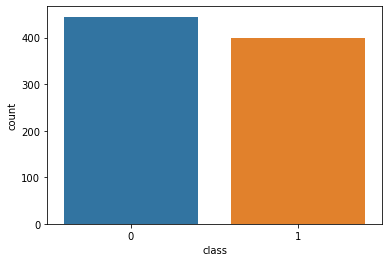

In [12]:
sns.countplot(x="class",data=data)

# <h2> Preprocessing of Text </h2>

# - Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/varun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     845 non-null    int64 
 1   contents  845 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.3+ KB


## Delete all the duplicates rows

In [16]:
#Deduplication of entries
data=data.drop_duplicates(subset={"class","contents"}, keep='first', inplace=False)
data.shape

(844, 2)

In [17]:
data['contents']  = data['contents'] .fillna("").apply(preprocess)

In [18]:
data.head()

class                                           contents
0      1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
1      1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
2      1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
3      1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
4      1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...

## wordcloud


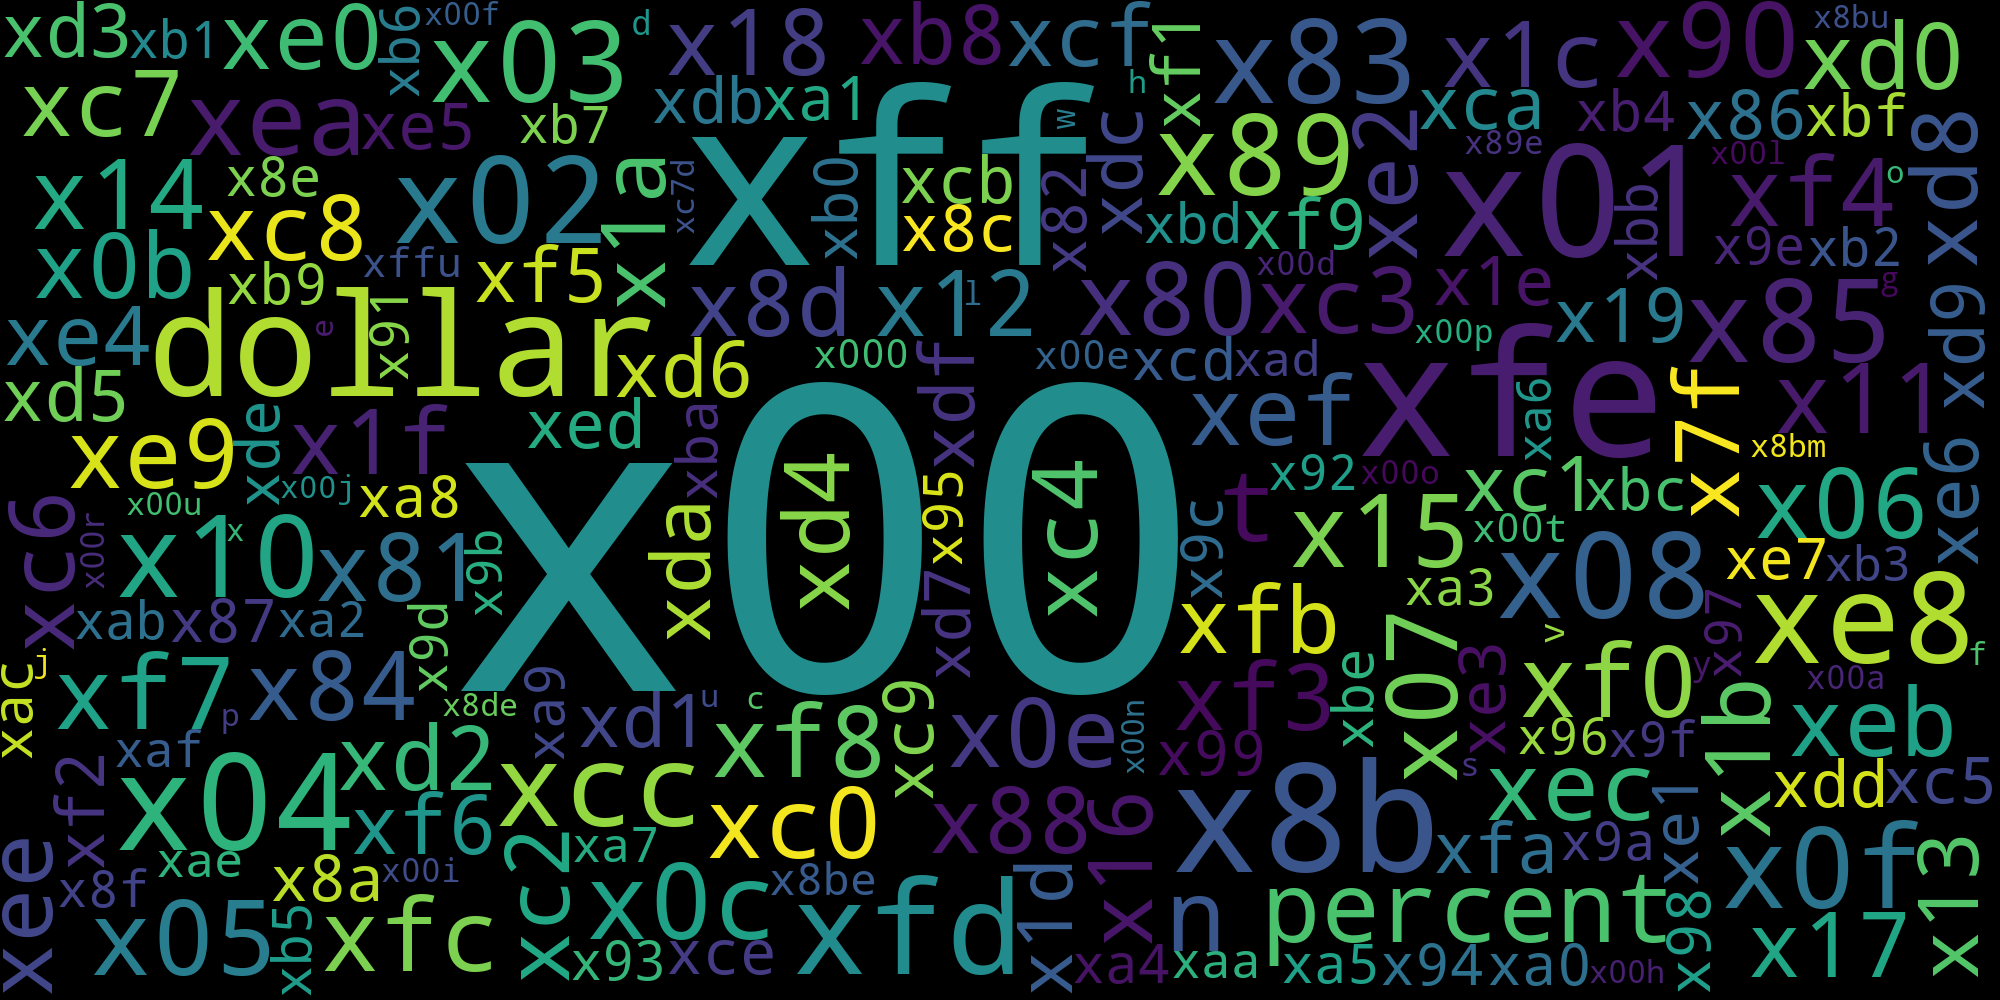

In [19]:
from wordcloud import WordCloud
import plotly.express as px
def nonan(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

text = ' '.join([nonan(abstract) for abstract in data["contents"]])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=2000, height=1000).generate(text)
fig = px.imshow(wordcloud)
fig.update_layout(title_text='Common words in comments')

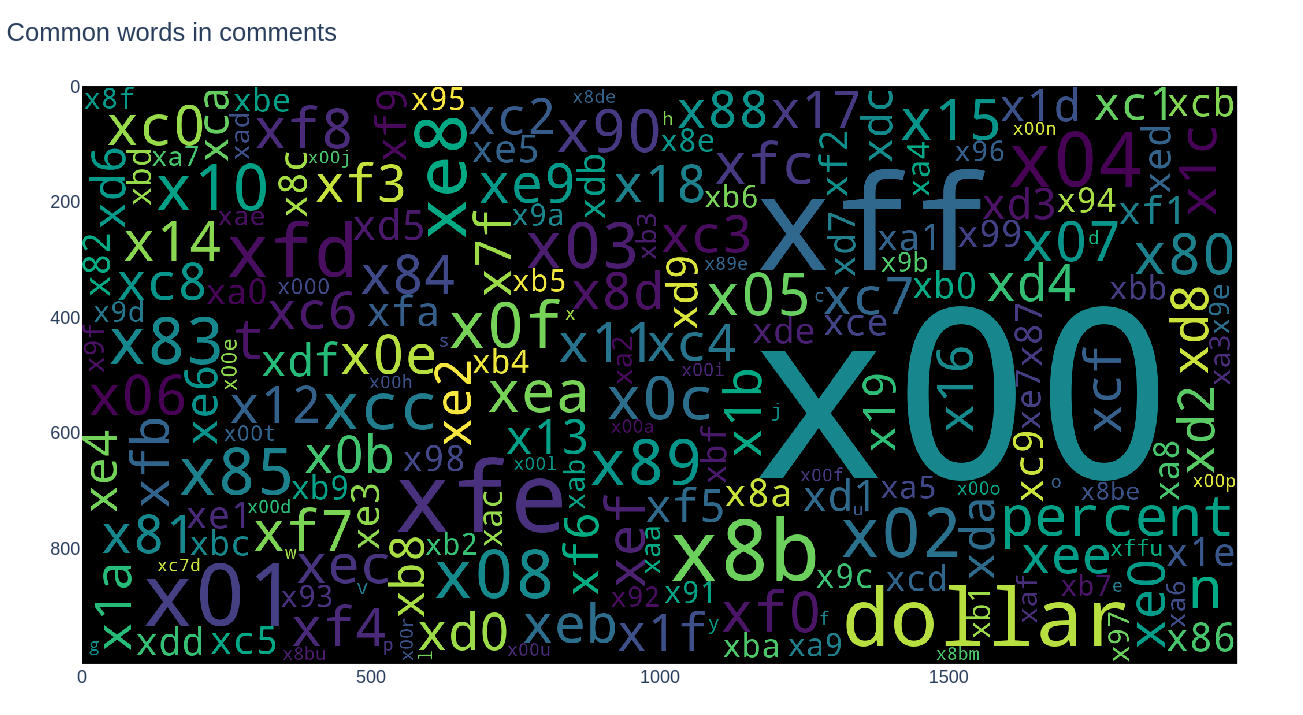

In [20]:
from IPython.display import Image
Image("wordcloud.png")

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [22]:
X = data.drop(['class'], axis=1)
y = data['class'].values
X.head(1)

contents
0  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...

## Split data train and test 70:30 ratio

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Apply TF-IDF nlp algo to covert words to vectors

In [24]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['contents'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train = vectorizer.transform(X_train['contents'].values)
X_test = vectorizer.transform(X_test['contents'].values)


In [25]:
X_train.shape

(590, 1365471)

In [26]:
X_test.shape

(254, 1365471)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Apply desion tree to binary classification

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  281.0       1.0      590.0         590.0
_______________________________________________
Confusion Matrix: 
 [[309   0]
 [  0 281]]

Test Result:
Accuracy Score: 95.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962406    0.942149  0.952756    0.952277      0.952915
recall       0.948148    0.957983  0.952756    0.953066      0.952756
f1-score     0.955224    0.950000  0.952756    0.952612      0.952776
support    135.000000  119.000000  0.952756  254.000000    254.000000
_______________________________________________

## Apply SVM to binary classification

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.701389    0.962025  0.771186    0.831707      0.825523
recall       0.980583    0.540925  0.771186    0.760754      0.771186
f1-score     0.817814    0.692483  0.771186    0.755148      0.758122
support    309.000000  281.000000  0.771186  590.000000    590.000000
_______________________________________________
Confusion Matrix: 
 [[303   6]
 [129 152]]

Test Result:
Accuracy Score: 77.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.701571    0.984127  0.771654    0.842849      0.833949
recall       0.992593    0.521008  0.771654    0.756800      0.771654
f1-score     0.822086    0.681319  0.771654    0.751702      0.756136
support    135.000000  119.000000  0.771654  254.000000    254.

## Apply RandomForest to binary classification

In [30]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  281.0       1.0      590.0         590.0
_______________________________________________
Confusion Matrix: 
 [[309   0]
 [  0 281]]

Test Result:
Accuracy Score: 93.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927536    0.939655  0.933071    0.933596      0.933214
recall       0.948148    0.915966  0.933071    0.932057      0.933071
f1-score     0.937729    0.927660  0.933071    0.932694      0.933011
support    135.000000  119.000000  0.933071  254.000000    254.000000
_______________________________________________

## Apply K-NN to binary classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3,n_jobs=4)
knn_clf.fit(X_train, y_train)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.970779    0.964539  0.967797    0.967659      0.967807
recall       0.967638    0.967972  0.967797    0.967805      0.967797
f1-score     0.969206    0.966252  0.967797    0.967729      0.967799
support    309.000000  281.000000  0.967797  590.000000    590.000000
_______________________________________________
Confusion Matrix: 
 [[299  10]
 [  9 272]]

Test Result:
Accuracy Score: 93.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.940299    0.925000  0.933071    0.932649      0.933131
recall       0.933333    0.932773  0.933071    0.933053      0.933071
f1-score     0.936803    0.928870  0.933071    0.932837      0.933086
support    135.000000  119.000000  0.933071  254.000000    254.

## I craete second csv file which have all test exe filepath(file location)

## Loading csv file

In [32]:
test=pd.read_csv("test_index")
test.head()

filepath
0  ../testdata/File1
1  ../testdata/File2
2  ../testdata/File3
3  ../testdata/File4
4  ../testdata/File5

In [33]:
test['contents']=None
test.head()

filepath contents
0  ../testdata/File1     None
1  ../testdata/File2     None
2  ../testdata/File3     None
3  ../testdata/File4     None
4  ../testdata/File5     None

## Loading all test exe files

In [34]:
import re
import string
    
for i,row in test.iterrows():
    
    filepath=os.path.join(os.getcwd(),row['filepath'].replace('../',''))
    with open(filepath, 'rb') as f:
        email_txt = f.read()
        email_text=str(email_txt)
        if i<2:
            print(email_txt)
        
    test.at[i,'contents']= email_txt
        
print(test.head())
print(test.info())

b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\xff\xff\x00\x00\xb8\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8\x00\x00\x00\x0e\x1f\xba\x0e\x00\xb4\t\xcd!\xb8\x01L\xcd!This program cannot be run in DOS mode.\r\r\n$\x00\x00\x00\x00\x00\x00\x00\xcd\xc2y\xda\x89\xa3\x17\x89\x89\xa3\x17\x89\x89\xa3\x17\x89\n\xbf\x19\x89\x88\xa3\x17\x89\xe0\xbc\x1e\x89\x8d\xa3\x17\x89`\xbc\x1a\x89\x88\xa3\x17\x89Rich\x89\xa3\x17\x89\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00PE\x00\x00L\x01\x03\x00\x18\x1f\xf3M\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x00\x0f\x01\x0b\x01\x06\x00\x00\xc0\x01\x00\x00\xb0\x00\x00\x00\x00\x00\x00\xd6\x1e\x00\x00\x00\x10\x00\x00\x00\xd0\x01\x00\x00\x00@\x00\x00\x10\x00\x00\x00\x10\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x80\x02\x00\x00\x10\x00\x00Q\x8a\x02\x00\x02\x00\x00\x

            filepath                                           contents
0  ../testdata/File1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
1  ../testdata/File2  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
2  ../testdata/File3  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
3  ../testdata/File4  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
4  ../testdata/File5  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  50 non-null     object
 1   contents  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes
None


In [35]:
test.head()

filepath                                           contents
0  ../testdata/File1  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
1  ../testdata/File2  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
2  ../testdata/File3  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
3  ../testdata/File4  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...
4  ../testdata/File5  b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\x...

## Applying same Preprocessing of Text also

In [36]:
test['contents']  = test['contents'] .fillna("").apply(preprocess)

In [37]:
test.head()

filepath                                           contents
0  ../testdata/File1  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
1  ../testdata/File2  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
2  ../testdata/File3  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
3  ../testdata/File4  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...
4  ../testdata/File5  b mz x90 x00 x03 x00 x00 x00 x04 x00 x00 x00 x...

## Apply TF-IDF nlp algo to covert words to vectors

In [38]:
final_tf_idf_test = vectorizer.transform(test['contents'].values)

In [39]:
final_tf_idf_test.shape

(50, 1365471)

In [40]:
test_y_pred =knn_clf.predict(final_tf_idf_test)

## Predicted output

In [41]:
print(test_y_pred)

[1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 0 0 1 0]


In [42]:
csv=pd.read_csv("test_index")
csv['Category'] = test_y_pred

In [43]:
csv.to_csv('testlabel.csv', index=False) 

In [44]:
output_csv=pd.read_csv("testlabel.csv")
output_csv.head(50)

filepath  Category
0    ../testdata/File1         1
1    ../testdata/File2         0
2    ../testdata/File3         1
3    ../testdata/File4         0
4    ../testdata/File5         1
5    ../testdata/File6         0
6    ../testdata/File7         1
7    ../testdata/File8         0
8    ../testdata/File9         1
9   ../testdata/File10         1
10  ../testdata/File11         0
11  ../testdata/File12         0
12  ../testdata/File13         1
13  ../testdata/File14         1
14  ../testdata/File15         0
15  ../testdata/File16         1
16  ../testdata/File17         0
17  ../testdata/File18         1
18  ../testdata/File19         1
19  ../testdata/File20         0
20  ../testdata/File21         0
21  ../testdata/File22         0
22  ../testdata/File23         0
23  ../testdata/File24         0
24  ../testdata/File25         0
25  ../testdata/File26         1
26  ../testdata/File27         0
27  ../testdata/File28         0
28  ../testdata/File29         1
29  ../testdata/File30         0
30  ../testdata/File31         1
31  ../testdata/File32         0
32  ../testdata/File33         1
33  ../testdata/File34         0
34  ../testdata/File35         1
35  ../testdata/File36         1
36  ../testdata/File37         1
37  ../testdata/File38         1
38  ../testdata/File39         0
39  ../testdata/File40         1
40  ../testdata/File41         0
41  ../testdata/File42         1
42  ../testdata/File43         0
43  ../testdata/File44         0
44  ../testdata/File45         0
45  ../testdata/File46         1
46  ../testdata/File47         0
47  ../testdata/File48         0
48  ../testdata/File49         1
49  ../testdata/File50         0